In [11]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')


# Load Data

In [26]:
tracks = pd.read_csv('../../data/processed/tracks_genres.csv', dtype=object)
tracks = tracks.set_index(['genres'])

tracks.head()

,Unnamed: 0,track_id,album_date_created,album_date_released,album_favorites,album_id,album_listens,album_tags,album_title,album_tracks,...,track_interest,track_language_code,track_listens,track_number,track_title,track_year_created,bit_rate_factor,listens_factor,interest_factor,track_price
genres,,,,,,,,,,,,,,,,,,,,,
Hip-Hop,0,2,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,4656,en,1293,3,Food,2008,0.7,2,1,3.49
Hip-Hop,1,3,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,1470,en,514,4,Electric Ave,2008,0.7,3,0.1,0.35
Hip-Hop,2,5,2008-11-26 1:44,2009-01-05 0:00,4,1,6073,[],AWOL - A Way Of Life,7,...,1933,en,1151,6,This World,2008,0.7,2,0.7,2.45
Pop,3,10,2008-11-26 1:45,2008-02-06 0:00,4,6,47632,[],Constant Hitmaker,2,...,54881,en,50135,1,Freeway,2008,0.5,1,1,2.5
"Folk,Pop,Experimental Pop,Singer-Songwriter",4,20,2008-11-26 1:45,2009-01-06 0:00,2,4,2710,[],Niris,13,...,978,en,361,3,Spiritual Level,2008,0.7,4,0.1,0.35


In [27]:
X_columns=["track_year_created"]
tracks = tracks[X_columns]

# normalize the columns
track_norm = tracks.copy()
track_norm
for col in X_columns:
    track_norm[col] = StandardScaler().fit_transform(track_norm[col].values.reshape(-1, 1))

track_norm

/home/cloudera/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,track_year_created
genres,
Hip-Hop,-1.852573
Hip-Hop,-1.852573
Hip-Hop,-1.852573
Pop,-1.852573
"Folk,Pop,Experimental Pop,Singer-Songwriter",-1.852573
"Folk,Pop,Experimental Pop,Singer-Songwriter",-1.852573
"Folk,Pop,Experimental Pop,Singer-Songwriter",-1.852573
"Folk,Pop,Experimental Pop,Singer-Songwriter",-1.852573
"Folk,Pop,Experimental Pop,Singer-Songwriter",-1.852573


# Model Training

In [28]:
k = 10
kmeans = KMeans(n_clusters=k).fit(track_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

tracks_results = tracks.copy()
track_norm['cluster'] = kmeans.labels_
tracks_results['cluster'] = kmeans.labels_


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Counter({4: 14471, 3: 13682, 1: 12919, 5: 12717, 6: 12346, 0: 11219, 2: 11030, 7: 9769, 8: 4233, 9: 2853})


# Analyze the results

[('Post-Punk,Rock,Punk', 969), ('Folk', 769), ('Rock', 635), ('Electronic', 436), ('Indie-Rock,Lo-Fi,Rock', 423), ('Avant-Garde,Experimental', 354), ('Punk,Rock', 350), ('Noise,Experimental', 308), ('Lo-Fi,Rock', 236), ('Folk,Pop,Experimental Pop,Singer-Songwriter', 216)]
[('Rock', 1042), ('Electronic', 626), ('Folk', 546), ('Hip-Hop', 377), ('Punk,Rock', 289), ('Noise,Experimental', 274), ('Experimental', 222), ('Indie-Rock,Rock', 219), ('Ambient Electronic,Electronic', 207), ('Post-Punk,Rock,Punk', 193)]
[('Hip-Hop', 441), ('Electronic', 429), ('Folk', 334), ('Rock', 311), ('Old-Time / Historic', 303), ('Punk,Rock', 276), ('Experimental', 221), ('Ambient Electronic,Electronic', 193), ('Indie-Rock,Rock', 181), ('Noise,Experimental,Electronic', 174)]
[('Rock', 1034), ('Electronic', 692), ('Folk', 563), ('Hip-Hop', 489), ('Punk,Rock', 374), ('Old-Time / Historic', 303), ('Avant-Garde,Experimental', 295), ('Indie-Rock,Rock', 250), ('Experimental', 232), ('Post-Punk,Rock,Punk', 227)]
[('R

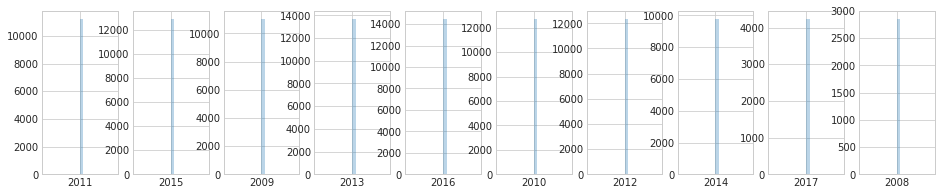

In [29]:
tracks_results = tracks_results.reset_index()
for cluster in sorted(set(kmeans.labels_)):
    print(collections.Counter(tracks_results[tracks_results['cluster']==cluster]['genres']).most_common(10))

n_clusters = len(set(kmeans.labels_))
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
        plt.hist(tracks_results[tracks_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()